In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import seaborn as sns

In [18]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')

print(data)


     Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0      sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1      sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2      sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3      sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4      sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
..          ...     ...       ...       ...       ...        ...     ...   
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0    7.1751

In [29]:
labels.keys()

Index(['Unnamed: 0', 'Class'], dtype='object')

In [20]:

print("Number of rows in data:", data.shape[0])
print("Number of columns in data:", data.shape[1])

Number of rows in data: 801
Number of columns in data: 20532


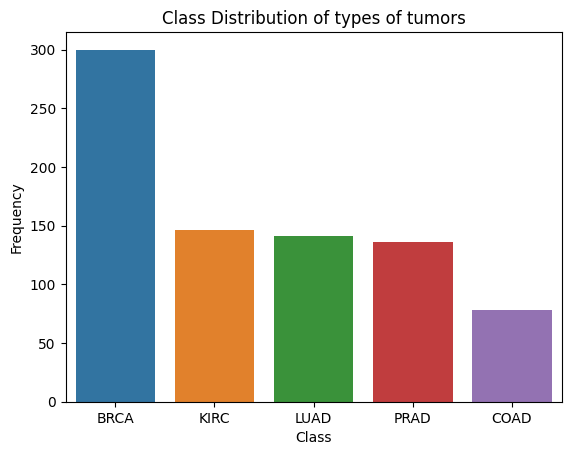

In [31]:
# Class distributions

# Count the occurrences of each class
class_counts = labels['Class'].value_counts()

# Create a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution of types of tumors')

# Show the plot
plt.show()

(801, 20531)
(801, 2)
       gene_0    gene_1    gene_2    gene_3    gene_4        gene_5    gene_6  \
PC1  0.000140 -0.003078 -0.003776 -0.001812 -0.002651  9.701034e-22 -0.003257   
PC2 -0.000007  0.000426 -0.002092  0.004012  0.002106  1.399283e-20 -0.002286   

       gene_7    gene_8    gene_9  ...  gene_20521  gene_20522  gene_20523  \
PC1  0.000699  0.000020 -0.000077  ...    0.003042   -0.001599   -0.000320   
PC2 -0.000525  0.000061  0.000094  ...   -0.004012   -0.001177   -0.001135   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
PC1   -0.011767    0.001977    0.001240    0.000390   -0.001232   -0.003503   
PC2   -0.012880   -0.003245    0.003019   -0.001585   -0.001546   -0.009793   

     gene_20530  
PC1    0.000328  
PC2    0.000322  

[2 rows x 20531 columns]
Most important features for PC1:
gene_3439     0.055466
gene_6733     0.055396
gene_219      0.053501
gene_1510     0.052407
gene_16132    0.052297
Name: PC1, dtype: float64
Most im

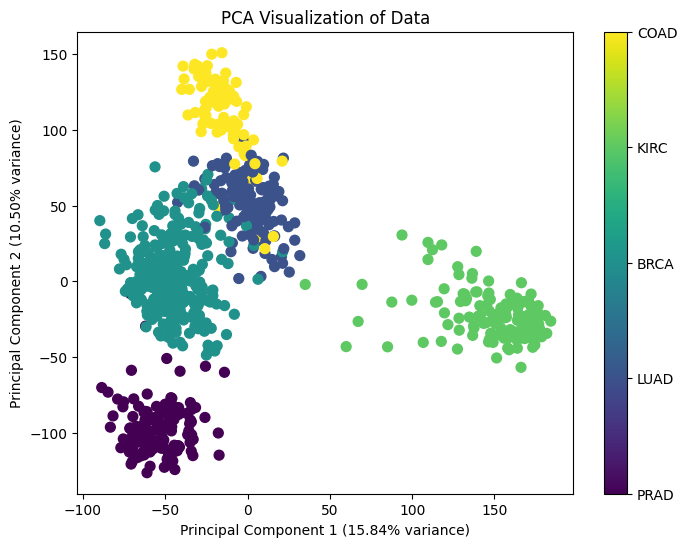

In [15]:
#  Drop non-numeric columns
data_numeric = data.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

print(data_numeric.shape)
# Convert labels to numeric
labels_numeric, uniques = pd.factorize(labels.iloc[:, 1].values)  # Use first column

print(labels.shape)

# Applying PCA to project data onto 2D
pca = PCA(n_components=2)

data_pca = pca.fit_transform(data_numeric)
explained_variance = pca.explained_variance_ratio_


# Plot the PCA result with class labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_numeric, cmap='viridis', s=50)

# Create a colorbar with the unique class labels
cbar = plt.colorbar(scatter, ticks=range(len(uniques)))
cbar.ax.set_yticklabels(uniques)  # Set colorbar labels to the original class names

# Set axis labels with the explained variance percentage
plt.title('PCA Visualization of Data')
plt.xlabel(f'Principal Component 1 ({explained_variance[0] * 100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1] * 100:.2f}% variance)')

plt.show()